# Color Detection

## load libraries

In [1]:
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

## load image

In [13]:
# load image from path ../../image_detection/images_test/test/01.png
image = cv2.imread('./test_images/01.png')
# image = cv2.imread('./test_images/05-1.png')

# reshape
pixels_bgr = image.reshape(-1, 3)

# Convert BGR to RGB
pixels_rgb = pixels_bgr[:, [2, 1, 0]]

# Perform PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
pixels_2d = pca.fit_transform(pixels_rgb)

# Apply DBSCAN to find dense regions
dbscan = DBSCAN(eps=1.5, min_samples=10)
dbscan.fit(pixels_2d)

# Get the labels for each point
labels = dbscan.labels_

# Filter out noise points (label == -1)
mask = labels != -1
filtered_pixels_2d = pixels_2d[mask]
filtered_pixels_rgb = pixels_rgb[mask]

# kmeans
optimal_clusters = 3  # Number of main colors you want to find
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(filtered_pixels_rgb)

# get colors
# Get the cluster centers (the main colors)
main_colors = kmeans.cluster_centers_

# Get the labels for each pixel
labels = kmeans.labels_

# Find the cluster with the most pixels
unique, counts = np.unique(labels, return_counts=True)
max_cluster = unique[np.argmax(counts)]

# Filter the pixels belonging to the cluster with the most pixels
max_cluster_pixels = filtered_pixels_rgb[labels == max_cluster]

# Create an image showing only the pixels of the largest cluster
max_cluster_image = np.zeros_like(pixels_rgb)
max_cluster_image[mask] = main_colors[labels]
max_cluster_image = max_cluster_image.reshape(image.shape)

total_pixels = pixels_rgb.shape[0]

# Calculate the relative counts
relative_counts = counts / total_pixels

print('Main colors:')
print(main_colors)
print('Relative counts:')
print(relative_counts)

Main colors:
[[ 94.42612437  87.25304433 131.26619581]
 [214.70906828 214.06325073 216.7374743 ]
 [136.98222679 130.30841167 171.24539757]]
Relative counts:
[0.2059263  0.31073617 0.34330563]


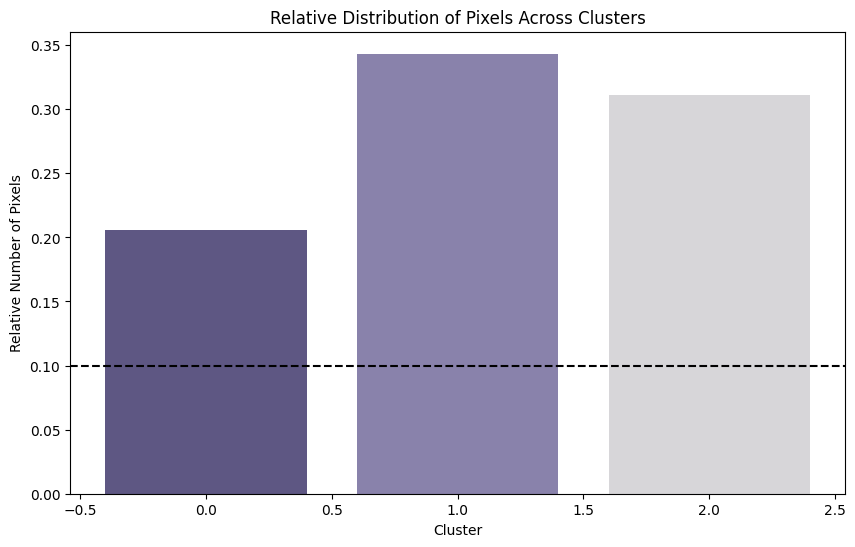

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(range(optimal_clusters), relative_counts, color=main_colors / 255.0)
plt.axhline(y=0.1, color='black', linestyle='--')
plt.xlabel('Cluster')
plt.ylabel('Relative Number of Pixels')
plt.title('Relative Distribution of Pixels Across Clusters')
plt.show()